<a href="https://colab.research.google.com/github/ITBA-Python/Certificacion-Profesional-Python/blob/main/Clase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../') 
import Helper as faux
import pandas as pd
from clases.Peliculas import Pelicula


#df_personas, df_trabajadores, df_usuarios, df_peliculas, df_scores=Faux.load_all()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Acciones con la clase Peliculas

# Cargo el df método create_df_from_csv() directamente desde la clase
df_peliculas = Pelicula.create_df_from_csv("../data/peliculas.csv")
#print(df_peliculas.tail())


FileNotFoundError: [Errno 2] No such file or directory: 'data/peliculas.csv'

In [191]:

#Creo Instancias de Pelicula
NuevaPeliSinID = Pelicula("PeliSinID",2025,['Adventure','Comedy',"Children's","Fantasy"])
NuevaPeliConIDExistente = Pelicula("PeliConIDExistente",2020,['Horror','Musical'],820)

#Doy de Alta satisfactoriamente con el metodo write_df
print(f'Agrego Peliculas Sin ID')
df_peliculasAgregado = NuevaPeliSinID.write_df(df_peliculas)
print(f'Rows del df original: {df_peliculas.shape[0]}\nRows del df Agregado: {df_peliculasAgregado.shape[0]}\n')

#Doy de Alta insatisfactoriamente con el metodo write_df ya que el ID existe
print(f'Fallo Agregando Peli con ID Existente')
df_peliculasAgregado2 = NuevaPeliConIDExistente.write_df(df_peliculas)
print(f'Rows del df original: {df_peliculas.shape[0]}\nRows del df Agregado2: {df_peliculasAgregado2.shape[0]}')



Agrego Peliculas Sin ID
Rows del df original: 1682
Rows del df Agregado: 1683

Fallo Agregando Peli con ID Existente
Error: No se pudo agregar, id ya existente
Rows del df original: 1682
Rows del df Agregado2: 1682


In [192]:
#Los criterios del filtro son todos AND salvo en generos que trae todos los mencionados, no hace falta que esten todos en la misma pelicula
#Vamos a Filtrar segun algunos criterios la df
ListaPelisFiltradas1= Pelicula.get_from_df(df_peliculas, nombre = 'space', anios = [1900,2000]) #El filtro de nombre es un contiene para ser mas abarcativo
ListaPelisFiltradas2= Pelicula.get_from_df(df_peliculas, generos = ['Comedy','Musical'], anios=[1940,1950])
ListaPelisFiltradas3= Pelicula.get_from_df(df_peliculas, id=135)

#Vamos a ver los filtros
print(f'Filtro1: cantidad {len(ListaPelisFiltradas1)} \n {ListaPelisFiltradas1}\n') # Se printean de acuerdo al metodo.__repr__ de la clase
print(f'Filtro2: cantidad {len(ListaPelisFiltradas2)}\n{ListaPelisFiltradas2}\n')
print(f'Filtro3: cantidad {len(ListaPelisFiltradas3)}\n{ListaPelisFiltradas3}')


Filtro1: cantidad 4 
 [
 [135] 2001: A Space Odyssey (1968) -Drama, Mystery, SciFi, Thriller-, 
 [758] Lawnmower Man 2: Beyond Cyberspace (1996) -SciFi, Thriller-, 
 [820] Space Jam (1996) -Adventure, Animation, Childrens, Comedy, Fantasy-, 
 [916] Lost in Space (1998) -Action, SciFi, Thriller-]

Filtro2: cantidad 13
[
 [418] Cinderella (1950) -Animation, Childrens, Musical-, 
 [432] Fantasia (1940) -Animation, Childrens, Musical-, 
 [478] Philadelphia Story, The (1940) -Comedy, Romance-, 
 [494] His Girl Friday (1940) -Comedy-, 
 [501] Dumbo (1941) -Animation, Childrens, Musical-, 
 [524] Great Dictator, The (1940) -Comedy-, 
 [605] Meet Me in St. Louis (1944) -Musical-, 
 [609] Father of the Bride (1950) -Comedy-, 
 [624] Three Caballeros, The (1945) -Animation, Childrens, Musical-, 
 [659] Arsenic and Old Lace (1944) -Comedy, Mystery, Thriller-, 
 [968] Inspector General, The (1949) -Musical-, 
 [1204] To Be or Not to Be (1942) -Comedy, Drama, War-, 
 [1452] Lady of Burlesque (1943)

In [193]:
print('Decidimos borrar de df_peliculas los resultados de ListaFiltrada2')
print(f'Rows del df original: {df_peliculas.shape[0]}')

for x in ListaPelisFiltradas2:
    df_peliculas=x.remove_from_df(df_peliculas)

print(f'Rows del df luego del borrado: {df_peliculas.shape[0]}')



Decidimos borrar de df_peliculas los resultados de ListaFiltrada2
Rows del df original: 1682
Rows del df luego del borrado: 1669


In [194]:
#Altero algun dato del filtro 3 por ejemplo el año y despues trato de borrarla
print(f'Rows del df original: {df_peliculas.shape[0]}')
ListaPelisFiltradas3[0].anio=2000
df_peliculas=ListaPelisFiltradas3[0].remove_from_df(df_peliculas)
print(f'Rows del df luego del intento de borrado: {df_peliculas.shape[0]}')


Rows del df original: 1669
No existe en el df recibido una película exactamente igual a la que invoca esta acción
Rows del df luego del intento de borrado: 1669


-Cantidad de peliculas en la selección:83

-Pelicula mas vieja:
 [442] Amityville Curse, The (1990) -Horror-
-
2 películas comparten la fecha mas reciente:[
 [362] Blues Brothers 2000 (1998) -Action, Comedy, Musical-, 
 [1243] Night Flier (1998) -Horror-]


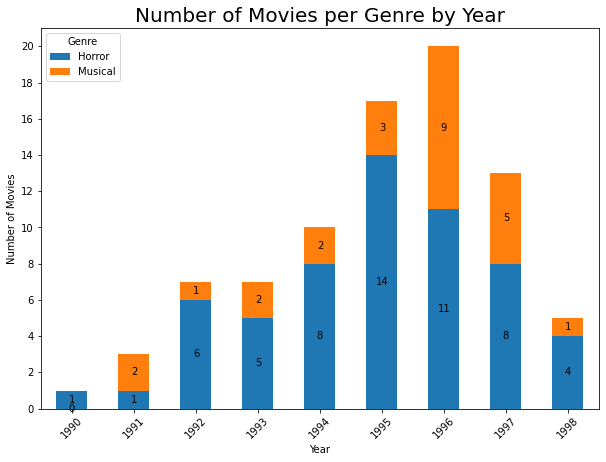

In [196]:
Pelicula.get_stats(df_peliculas, anios=[1990,2000],generos=['Horror','Musical'])

-Cantidad de peliculas en la selección:214

-2 películas comparten la fecha mas vieja:[
 [175] Brazil (1985) -SciFi-, 
 [204] Back to the Future (1985) -Comedy, SciFi-]
-
Pelicula mas reciente:

 [916] Lost in Space (1998) -Action, SciFi, Thriller-


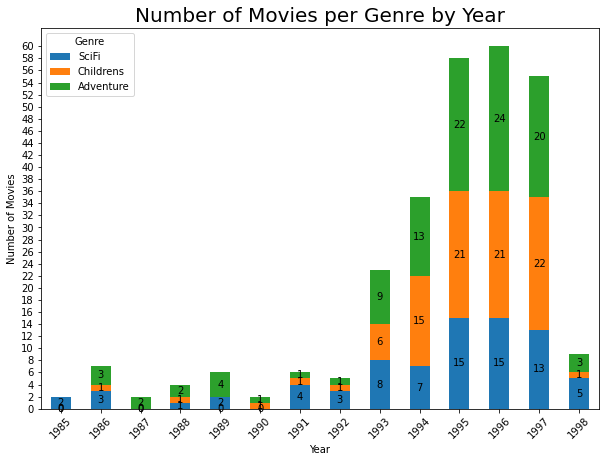

In [202]:
Pelicula.get_stats(df_peliculas, anios=[1985,2000],generos=['Sci-Fi',"Children's","Adventure"])